In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.random as rd
import statistics as st
import time
from scipy.stats import gmean


In [ ]:
#Function to calculate arithmetic option price
def get_arith_price(price_list, days):
  T = days/365
  A = st.mean(price_list)
  #print("Average price: ", A)
  option_value_T = max(A-K, 0)
  #print("Option Value T: ", option_value_T)
  option_value_t = math.exp(-r*(T-t))*option_value_T
  #print("Option Value t: ", option_value_t)
  return option_value_t 

In [ ]:
#Function to calculate geometric option price
def get_geo_price(price_list, days):
  T = days/365
  G = gmean(price_list)
  #print("Average price: ", G)
  option_value_T = max(G-K, 0)
  #print("Option Value T: ", option_value_T)
  option_value_t = math.exp(-r*(T-t))*option_value_T
  #print("Option Value t: ", option_value_t)
  return option_value_t 

In [ ]:
#Function to simulate stock price
#takes in 
#S0 = initial stock price
#T = expiry date months (3, 6 or 12)
#
def stock_path_simulator(S0, days):
  price_arr = np.zeros(shape=days)
  price_arr[0] = S0
  for i in range(days-1):
    Zt = rd.standard_normal()
    price_arr[i+1] = price_arr[i]*math.exp((r-(0.5*sigma**2))*(1/365)+((sigma*math.sqrt(1/365))*Zt))
  return price_arr



In [ ]:
def n_simulator(n, T, S0):
  start_time = time.perf_counter()
  sim_array = np.zeros(shape=(n, T))
  sim_option_prices_A = np.zeros(n)
  sim_option_prices_G = np.zeros(n)
  for i in range(n):
    sim_array[i] = stock_path_simulator(S0, T)
    #print(sim_array.shape)
    option_price_A = get_arith_price(sim_array[i][1:], T)
    option_price_G = get_geo_price(sim_array[i], T)
    sim_option_prices_A[i] = option_price_A
    sim_option_prices_G[i] = option_price_G
  end_time = time.perf_counter()
  timer = round(end_time - start_time, 2)
  print("Time elapsed: ", timer,"seconds\nSimulations run: ", n)
  return sim_array, sim_option_prices_A, sim_option_prices_G


Testing

In [ ]:
K = 50
r = 0.05         ## As effective rate
sigma = 0.02     ## as effective rate
t = 0
S0 = 50
T = 6
fraction_of_year = 12/T
days = int(365/fraction_of_year)

In [ ]:
stock_path_sims_10k, sim_option_prices_10k_A, sim_option_prices_10k_G = n_simulator(10000, days, S0)
print("Days: ", days)
print("Stock path sims 10k shape: ", stock_path_sims_10k.shape)
print("Option prices 10k shape: ", sim_option_prices_10k_A.shape)
print("Option price A 10k sims: ", round(st.mean(sim_option_prices_10k_A), 5))
print("Option price G 10k sims: ", round(st.mean(sim_option_prices_10k_G), 5))

Time elapsed:  6.51 seconds
Simulations run:  10000
Days:  182
Stock path sims 10k shape:  (10000, 182)
Option prices 10k shape:  (10000,)
Option price A 10k sims:  0.62938
Option price G 10k sims:  0.62384


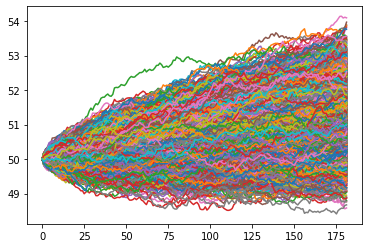

In [ ]:
plt.plot(stock_path_sims_10k.T);

3 Month

In [ ]:
T = 3
fraction_of_year = 12/T
days = int(365/fraction_of_year)
n = 1000000   # Simulations

In [ ]:
stock_path_sims_1000k, sim_option_prices_1000k_A, sim_option_prices_1000k_G = n_simulator(n, days, S0)

Time elapsed:  375.11 seconds
Simulations run:  1000000


In [ ]:
print("Average price of 1000k simulations for 3 month expiry (Arithmetic): ", round(st.mean(sim_option_prices_1000k_A), 5))
print("Average price of 1000k simulations for 3 month expiry (Geometric): ", round(st.mean(sim_option_prices_1000k_G), 5))

Average price of 1000k simulations for 3 month expiry (Arithmetic):  0.32949
Average price of 1000k simulations for 3 month expiry (Geometric):  0.32517


6 Month

In [ ]:
T = 6
fraction_of_year = 12/T
days = int(365/fraction_of_year)

In [ ]:
stock_path_sims_1000k, sim_option_prices_1000k_A, sim_option_prices_1000k_G = n_simulator(n, days, S0)

Time elapsed:  652.74 seconds
Simulations run:  1000000


In [ ]:
print("Average price of 1000k simulations for 6 month expiry (Arithmetic): ", round(st.mean(sim_option_prices_1000k_A), 5))
print("Average price of 1000k simulations for 6 month expiry (Geometric): ", round(st.mean(sim_option_prices_1000k_G), 5))

Average price of 1000k simulations for 6 month expiry (Arithmetic):  0.62404
Average price of 1000k simulations for 6 month expiry (Geometric):  0.61855


12 Month

In [ ]:
T = 12
fraction_of_year = 12/T
days = int(365/fraction_of_year)

In [ ]:
stock_path_sims_1000k, sim_option_prices_1000k_A, sim_option_prices_1000k_G = n_simulator(n, days, S0)

Time elapsed:  1198.36 seconds
Simulations run:  1000000


In [ ]:
print("Average price of 1000k simulations for 12 month expiry (Arithmetic): ", round(st.mean(sim_option_prices_1000k_A), 5))
print("Average price of 1000k simulations for 12 month expiry (Geometric): ", round(st.mean(sim_option_prices_1000k_G), 5))

Average price of 1000k simulations for 12 month expiry (Arithmetic):  1.21224
Average price of 1000k simulations for 12 month expiry (Geometric):  1.20223
